<a href="https://colab.research.google.com/github/LamNg99/Intelligent-Systems/blob/main/Lam_Nguyen_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab  #1

First and Last Name: Lam Nguyen

Student ID: 500838417

Video URL: -----------------------

# Gradient Descent for Univariate Linear Regression
This notebook looks into Python_based codes in attempt to implement Gradient Descent for solving a linear regression problem. The overall goal aims to builds a machine learning model capable of predicting the final mark based on the midterm mark using the [student marks data set](https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv).

In [ ]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Model Evaluations
from sklearn.metrics import mean_squared_error

## Data preparation and EDA
The dataset contains the midterm marks and final marks of 100 students in the previous semester without missing any value.

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/ELE888 data/student_marks.csv')
df.shape # (rows, columns)

(100, 2)

In [ ]:
df.head()

,Midterm mark,Final mark
0,32.5,31.7
1,53.4,68.8
2,61.5,62.6
3,47.5,71.5
4,59.8,87.2


In [ ]:
df.describe()

,Midterm mark,Final mark
count,100.000000,100.000000
mean,48.959000,72.735000
std,9.746495,16.658249
min,25.100000,31.700000
25%,41.550000,60.775000
50%,49.600000,72.150000
75%,56.750000,83.175000
max,70.300000,118.600000


In [ ]:
midterm_mean = df['Midterm mark'].mean()
midterm_std =df['Midterm mark'].std()
final_mean = df['Final mark'].mean()
final_std = df['Final mark'].std()

In [ ]:
print(f'Mean of midterm mark: {midterm_mean:.2f}')
print(f'Standar deviation of midterm mark: {midterm_std:.2f}')
print(f'Mean of final mark: {final_mean:.2f}')
print(f'Standar deviation of final mark: {final_std:.2f}')

Mean of midterm mark: 48.96
Standar deviation of midterm mark: 9.75
Mean of final mark: 72.73
Standar deviation of final mark: 16.66


## Implementation steps

### Standardization
Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance). This method is widely used for normalization in many machine learning algorithms as follows:

$$ x^{'} = \frac{x-\bar{x}}{\sigma} $$

In [ ]:
def standardize(data):
  mean = data.mean()
  std_dev = data.std()
  standardized_data = (data - mean) / std_dev
  return standardized_data

### Error (Cost function)
Given a sequence of points, $y_{i}$, and a sequence of points predicted by the model, $\hat{y}_{i}$, the **Mean Squared Error (MSE)** is:

$$ Error = \frac{1}{n}\sum^{n}_{i=1}(y_{i} - \hat{y}_{i})^{2}$$

Our objective is to minimize this value. Inserting our linear regression model in for the $y_{i}$ predictions, and we are doing regression on only one variable, we get:

$$ Error_{(m,b)} = \frac{1}{N}\sum^{N}_{i=1}(y_{i} - (mx_{i}+b))^{2}$$


In [ ]:
def cost_function(X, y, m, b):
  N = len(X)
  error = 0

  for i in range(N):
    error += (y[i] - (m*X[i] + b))**2

  return error/N

### Gradient Partial Descent
Gradient descent is an optimization algorithm that is used to minimize a cost function. In the case of linear regression, the cost function is the mean squared error (MSE) function. The idea behind gradient descent is to iteratively update the parameters of the model (such as the slope and intercept in the case of linear regression) in the direction of the negative gradient of the cost function, with the goal of reaching the minimum of the function.

$$ \frac{\partial}{\partial{m}} = \frac{2}{N}\sum^{N}_{i=1}{-x_{i}}(y_{i} - (mx_{i}+b))$$


$$ \frac{\partial}{\partial{b}} = \frac{2}{N}\sum^{N}_{i=1}-(y_{i} - (mx_{i}+b))$$

In [ ]:
def gradient_descent(X, y, m, b):
  dm = 0
  db = 0
  N = len(X)

  for i in range(N):
    dm += -X[i]*(y[i] - (m*X[i] + b))
    db += -(y[i] - (m*X[i] + b))

  return dm/(2*N), db/(2*N)

### Updating $m$ and $b$ using a learning rate $\alpha$
$$ m_{new} = m_{old} - {\alpha}\frac{\partial{E}}{\partial{m}}$$

$$ b_{new} = b_{old} - {\alpha}\frac{\partial{E}}{\partial{m}}$$

The learning rate $\alpha$ variable controls how large of a step we take downhill during each iteration. 

In [ ]:
def update_params(X, y, m, b, learning_rate):
  dm, db = gradient_descent(X, y, m, b)
  m -= learning_rate * dm
  b -= learning_rate * db

  return m, b


### Implement train function

In [ ]:
def train(X, y, m, b, learning_rate, iterations):
  cost_history = []

  for i in range(iterations):
    m, b = update_params(X, y, m, b, learning_rate)
    cost = cost_function(X, y, m, b)
    cost_history.append(cost)

    if iterations <= 100:
      if (i+1)%10 == 0:
        print(f'Iteration: {i+1} ----> m: {m:.2f}, b: {b:.2f}, cost: {cost:.2f}')
    
    else:
      if (i+1)%100 == 0:
        print(f'Iteration: {i+1} ----> m: {m:.2f}, b: {b:.2f}, cost: {cost:.2f}')

  return m, b, cost_history



### Implement predict function

In [ ]:
def predict(X, m, b):
  return X * m + b 

## Performing Gradient Descent for Linear Regression

### Data preproccessing

In [ ]:
# Split data into X and y 
X = df.iloc[:,0]
y = df.iloc[:,1]

print(X, y)

0     32.5
1     53.4
2     61.5
3     47.5
4     59.8
      ... 
95    50.0
96    49.2
97    50.0
98    48.1
99    25.1
Name: Midterm mark, Length: 100, dtype: float64 0     31.7
1     68.8
2     62.6
3     71.5
4     87.2
      ... 
95    81.5
96    72.1
97    85.2
98    66.2
99    53.5
Name: Final mark, Length: 100, dtype: float64


### Fitting data 

In [ ]:
# Initialize parameters
m = -0.5
b = 0
alpha = 0.0001

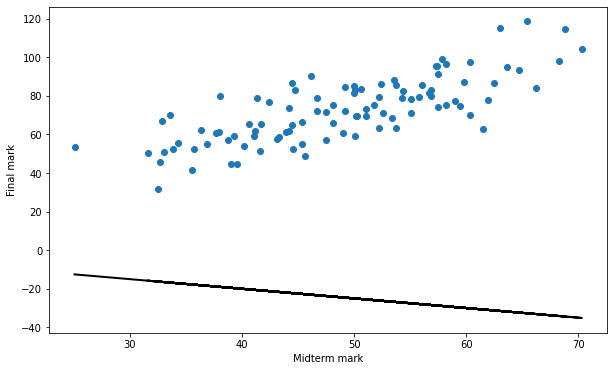

In [ ]:
# Plot datapoints and the initial regression line with (m = -0.5, b = 0)

plt.figure(figsize = (10, 6))

plt.scatter(X, y)
plt.plot(X, predict(X=X, m=m, b=b), color = 'black', linewidth = 2)
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')

plt.show()

In [ ]:
# Update m and b 100 times
m_100, b_100, cost_history_100 = train(X=X, y=y, m=m, b=b, learning_rate=alpha, iterations=100)

Iteration: 10 ----> m: 0.96, b: 0.03, cost: 794.48
Iteration: 20 ----> m: 1.34, b: 0.04, cost: 160.38
Iteration: 30 ----> m: 1.44, b: 0.04, cost: 116.09
Iteration: 40 ----> m: 1.47, b: 0.04, cost: 113.00
Iteration: 50 ----> m: 1.48, b: 0.04, cost: 112.78
Iteration: 60 ----> m: 1.48, b: 0.04, cost: 112.76
Iteration: 70 ----> m: 1.48, b: 0.04, cost: 112.76
Iteration: 80 ----> m: 1.48, b: 0.04, cost: 112.76
Iteration: 90 ----> m: 1.48, b: 0.04, cost: 112.76
Iteration: 100 ----> m: 1.48, b: 0.04, cost: 112.76


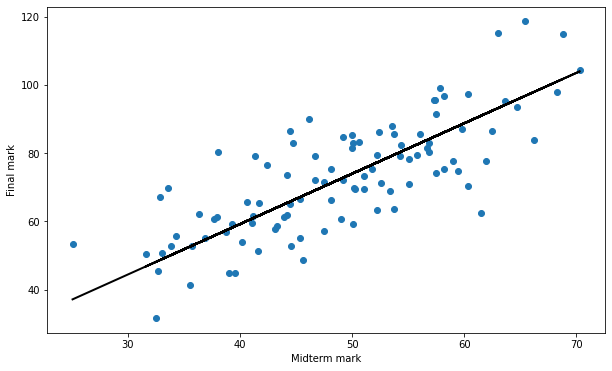

In [ ]:
# Plot datapoints and the regression line after 100 iterations

plt.figure(figsize = (10, 6))

plt.scatter(X, y)
plt.plot(X, predict(X=X, m=m_100, b=b_100), color = 'black', linewidth = 2)
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')

plt.show()

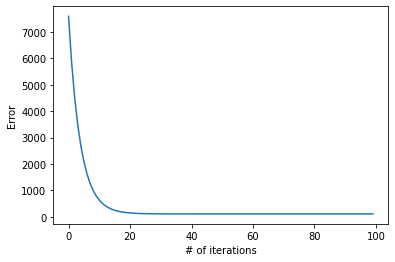

In [ ]:
# Plot the cost function after 100 iterations

plt.xlabel('# of iterations')
plt.ylabel('Error')
plt.plot(cost_history_100)
plt.show()

In [ ]:
# Update m and b 2000 times
m_2000, b_2000, cost_history_2000 = train(X=X, y=y, m=m, b=b, learning_rate=alpha, iterations=2000)

Iteration: 100 ----> m: 1.48, b: 0.04, cost: 112.76
Iteration: 200 ----> m: 1.48, b: 0.04, cost: 112.76
Iteration: 300 ----> m: 1.48, b: 0.04, cost: 112.76
Iteration: 400 ----> m: 1.48, b: 0.04, cost: 112.76
Iteration: 500 ----> m: 1.48, b: 0.05, cost: 112.76
Iteration: 600 ----> m: 1.48, b: 0.05, cost: 112.76
Iteration: 700 ----> m: 1.48, b: 0.05, cost: 112.76
Iteration: 800 ----> m: 1.48, b: 0.05, cost: 112.76
Iteration: 900 ----> m: 1.48, b: 0.05, cost: 112.76
Iteration: 1000 ----> m: 1.48, b: 0.05, cost: 112.76
Iteration: 1100 ----> m: 1.48, b: 0.06, cost: 112.75
Iteration: 1200 ----> m: 1.48, b: 0.06, cost: 112.75
Iteration: 1300 ----> m: 1.48, b: 0.06, cost: 112.75
Iteration: 1400 ----> m: 1.48, b: 0.06, cost: 112.75
Iteration: 1500 ----> m: 1.48, b: 0.06, cost: 112.75
Iteration: 1600 ----> m: 1.48, b: 0.06, cost: 112.75
Iteration: 1700 ----> m: 1.48, b: 0.06, cost: 112.75
Iteration: 1800 ----> m: 1.48, b: 0.07, cost: 112.75
Iteration: 1900 ----> m: 1.48, b: 0.07, cost: 112.75
It

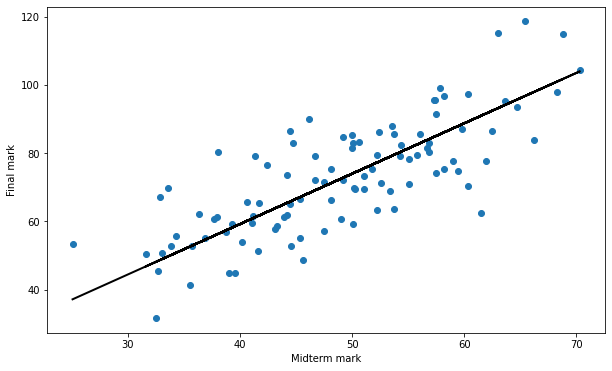

In [ ]:
# Plot datapoints and the regression line after 100 iterations

plt.figure(figsize = (10, 6))

plt.scatter(X, y)
plt.plot(X, predict(X=X, m=m_2000, b=b_2000), color = 'black', linewidth = 2)
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')

plt.show()

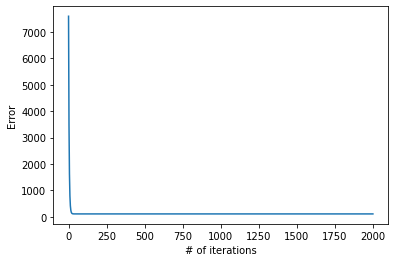

In [ ]:
# Plot the cost function after 100 iterations

plt.xlabel('# of iterations')
plt.ylabel('Error')
plt.plot(cost_history_2000)
plt.show()

### Verifying results using Numpy Polyfit function

In [ ]:
# Find line of best fit
m_fit, b_fit = np.polyfit(X, y, 1)

print(f'Slope: {m_fit:.2f}')
print(f'Intercept: {b_fit:.2f}')

Slope: 1.32
Intercept: 8.01


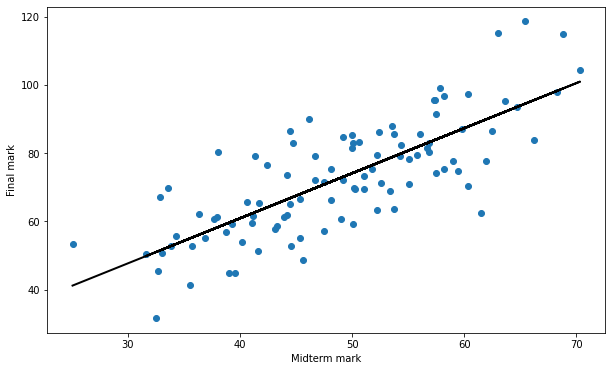

In [ ]:
plt.figure(figsize = (10, 6))

plt.scatter(X, y)
plt.plot(X, predict(X=X, m=m_fit, b=b_fit), color = 'black', linewidth = 2)
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')

plt.show()

### Verifying using Linear Regression model from Scikit-Learn

In [ ]:
# Initialize model
LR_model = LinearRegression()

# Fit the data into model
LR_model.fit(np.array(X).reshape(-1,1), np.array(y).reshape(-1,1))


LinearRegression()

In [ ]:
intercept = LR_model.intercept_.item()
slope = LR_model.coef_.item()
error = mean_squared_error(y, predict(X=X, m=slope, b=intercept))
print(f'Slope: {slope:0.2f}')
print(f'Intercept: {intercept:0.2f}')
print(f'Error: {error:.2f}')

Slope: 1.32
Intercept: 8.01
Error: 110.36


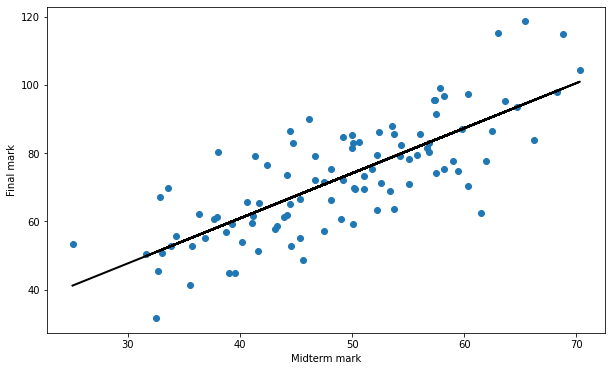

In [ ]:
plt.figure(figsize = (10, 6))

plt.scatter(X, y)
plt.plot(X, predict(X=X, m=slope, b=intercept), color = 'black', linewidth = 2)
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')

plt.show()

## Linear Regression after standardization
If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected. That is the reason why standardization of datasets is a common requirement for many machine learning estimators.

### Scaling feature

In [ ]:
X_scaled = standardize(data=X)
X_scaled

0    -1.688710
1     0.455651
2     1.286719
3    -0.149695
4     1.112297
        ...   
95    0.106808
96    0.024727
97    0.106808
98   -0.088134
99   -2.447957
Name: Midterm mark, Length: 100, dtype: float64

In [ ]:
print(f'Mean of midterm mark after standadization: {X_scaled.mean():.2f}')
print(f'Standar deviation of midterm mark after standadization: {X_scaled.std():.2f}')

Mean of midterm mark after standadization: -0.00
Standar deviation of midterm mark after standadization: 1.00


In [ ]:
y_scaled = standardize(data=y)
y_scaled

0    -2.463344
1    -0.236219
2    -0.608407
3    -0.074137
4     0.868339
        ...   
95    0.526166
96   -0.038119
97    0.748278
98   -0.392298
99   -1.154683
Name: Final mark, Length: 100, dtype: float64

In [ ]:
print(f'Mean of final mark after standadization: {y_scaled.mean():.2f}')
print(f'Standar deviation of final mark after standadization: {y_scaled.std():.2f}')

Mean of final mark after standadization: 0.00
Standar deviation of final mark after standadization: 1.00


### Fitting data

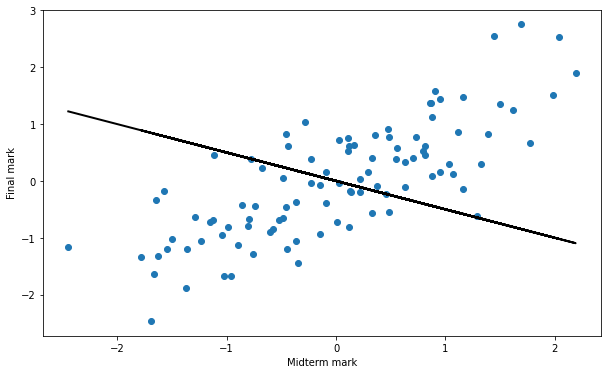

In [ ]:
# Plot datapoints and the initial regression line with (m = -0.5, b = 0)

plt.figure(figsize = (10, 6))

plt.scatter(X_scaled, y_scaled)
plt.plot(X_scaled, predict(X=X_scaled, m=m, b=b), color = 'black', linewidth = 2)
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')

plt.show()

In [ ]:
# Update m and b 100 times
m_scaled_100, b_scaled_100, cost_history_scaled_100 = train(X=X_scaled, y=y_scaled, m=m, b=b, learning_rate=alpha, iterations=100)

Iteration: 10 ----> m: -0.50, b: -0.00, cost: 2.00
Iteration: 20 ----> m: -0.50, b: -0.00, cost: 2.00
Iteration: 30 ----> m: -0.50, b: -0.00, cost: 2.00
Iteration: 40 ----> m: -0.50, b: -0.00, cost: 2.00
Iteration: 50 ----> m: -0.50, b: -0.00, cost: 2.00
Iteration: 60 ----> m: -0.50, b: -0.00, cost: 1.99
Iteration: 70 ----> m: -0.50, b: -0.00, cost: 1.99
Iteration: 80 ----> m: -0.49, b: -0.00, cost: 1.99
Iteration: 90 ----> m: -0.49, b: -0.00, cost: 1.99
Iteration: 100 ----> m: -0.49, b: -0.00, cost: 1.99


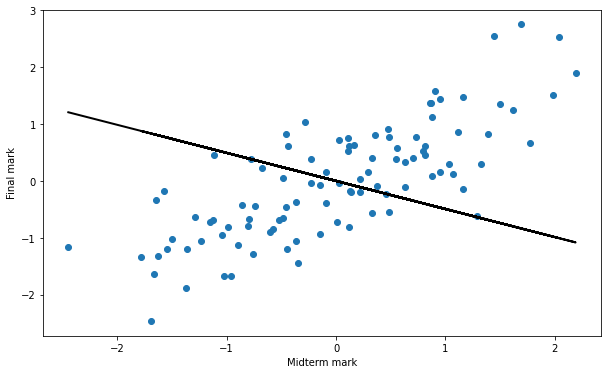

In [ ]:
# Plot datapoints and the regression line after 100 iterations

plt.figure(figsize = (10, 6))

plt.scatter(X_scaled, y_scaled)
plt.plot(X_scaled, predict(X=X_scaled, m=m_scaled_100, b=b_scaled_100), color = 'black', linewidth = 2)
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')

plt.show()

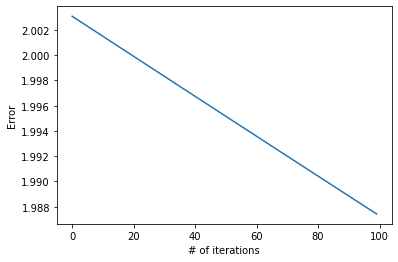

In [ ]:
# Plot the cost function after 100 iterations

plt.xlabel('# of iterations')
plt.ylabel('Error')
plt.plot(cost_history_scaled_100)
plt.show()

In [ ]:
# Update m and b 2000 times
m_scaled_2000, b_scaled_2000, cost_history_scaled_2000 = train(X=X_scaled, y=y_scaled, m=m, b=b, learning_rate=alpha, iterations=2000)

Iteration: 100 ----> m: -0.49, b: -0.00, cost: 1.99
Iteration: 200 ----> m: -0.49, b: -0.00, cost: 1.97
Iteration: 300 ----> m: -0.48, b: -0.00, cost: 1.96
Iteration: 400 ----> m: -0.48, b: -0.00, cost: 1.94
Iteration: 500 ----> m: -0.47, b: -0.00, cost: 1.93
Iteration: 600 ----> m: -0.46, b: -0.00, cost: 1.91
Iteration: 700 ----> m: -0.46, b: -0.00, cost: 1.90
Iteration: 800 ----> m: -0.45, b: -0.00, cost: 1.88
Iteration: 900 ----> m: -0.44, b: -0.00, cost: 1.87
Iteration: 1000 ----> m: -0.44, b: -0.00, cost: 1.85
Iteration: 1100 ----> m: -0.43, b: -0.00, cost: 1.84
Iteration: 1200 ----> m: -0.43, b: -0.00, cost: 1.82
Iteration: 1300 ----> m: -0.42, b: -0.00, cost: 1.81
Iteration: 1400 ----> m: -0.41, b: -0.00, cost: 1.80
Iteration: 1500 ----> m: -0.41, b: -0.00, cost: 1.78
Iteration: 1600 ----> m: -0.40, b: -0.00, cost: 1.77
Iteration: 1700 ----> m: -0.40, b: -0.00, cost: 1.75
Iteration: 1800 ----> m: -0.39, b: -0.00, cost: 1.74
Iteration: 1900 ----> m: -0.39, b: -0.00, cost: 1.73
It

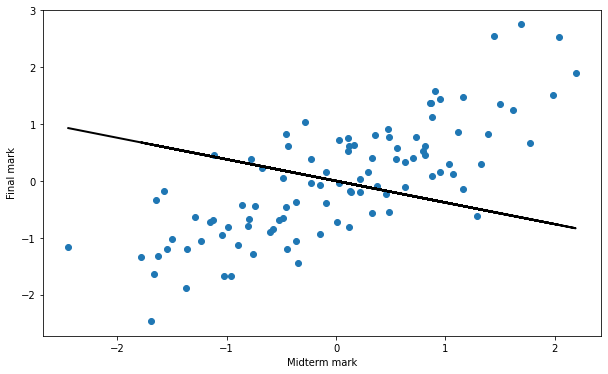

In [ ]:
# Plot datapoints and the regression line after 2000 iterations

plt.figure(figsize = (10, 6))

plt.scatter(X_scaled, y_scaled)
plt.plot(X_scaled, predict(X=X_scaled, m=m_scaled_2000, b=b_scaled_2000), color = 'black', linewidth = 2)
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')

plt.show()

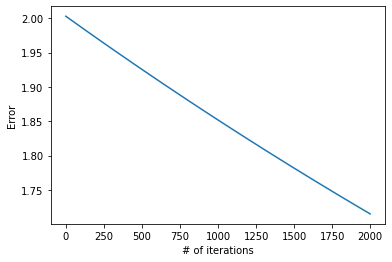

In [ ]:
# Plot the cost function after 100 iterations

plt.xlabel('# of iterations')
plt.ylabel('Error')
plt.plot(cost_history_scaled_2000)
plt.show()

### Verifying results using Numpy Polyfit function

In [ ]:
# Find line of best fit
m_fit_scaled, b_fit_scaled = np.polyfit(X_scaled, y_scaled, 1)

print(f'Slope: {m_fit_scaled:.2f}')
print(f'Intercept: {b_fit_scaled:.2f}')

Slope: 0.77
Intercept: 0.00


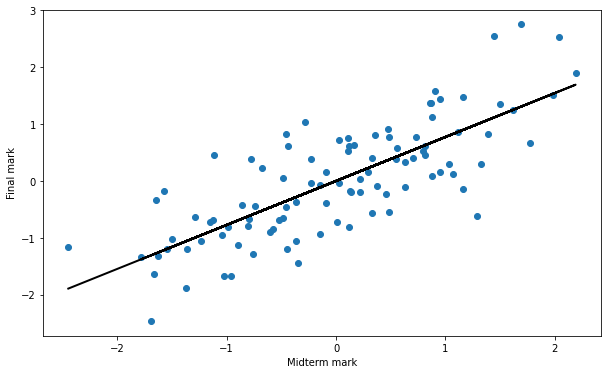

In [ ]:
plt.figure(figsize = (10, 6))

plt.scatter(X_scaled, y_scaled)
plt.plot(X_scaled, predict(X=X_scaled, m=m_fit_scaled, b=b_fit_scaled), color = 'black', linewidth = 2)
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')

plt.show()

### Verifying using Linear Regression model from Scikit-Learn

In [ ]:
# Initialize model
LR_model_scaled = LinearRegression()

# Fit the data into model
LR_model_scaled.fit(np.array(X_scaled).reshape(-1,1), np.array(y_scaled).reshape(-1,1))


LinearRegression()

In [ ]:
intercept_scaled = LR_model_scaled.intercept_.item()
slope_scaled = LR_model_scaled.coef_.item()
error_scaled = mean_squared_error(y, predict(X=X_scaled, m=slope_scaled, b=intercept_scaled))
print(f'Slope: {slope_scaled:0.2f}')
print(f'Intercept: {intercept_scaled:0.2f}')
print(f'Error: {error_scaled:.2f}')

Slope: 0.77
Intercept: 0.00
Error: 5545.96


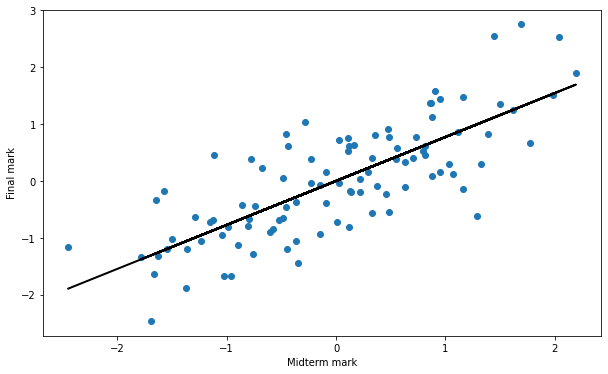

In [ ]:
plt.figure(figsize = (10, 6))

plt.scatter(X_scaled, y_scaled)
plt.plot(X_scaled, predict(X=X_scaled, m=slope_scaled, b=intercept_scaled), color = 'black', linewidth = 2)
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')

plt.show()